<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_child.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])


In [ ]:
#childs
ch.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
252,1,0,1,0,1,1,1,1,0,1,...,m,'Middle Eastern ',yes,no,Jordan,no,7,'4-11 years',Parent,YES
130,1,1,1,1,1,1,1,0,1,1,...,m,White-European,no,no,'New Zealand',yes,9,'4-11 years',Parent,YES
132,0,1,1,1,1,1,0,0,0,1,...,m,White-European,yes,yes,'United Kingdom',no,6,'4-11 years',Parent,NO
218,0,0,1,0,0,0,1,0,1,0,...,m,Others,no,no,'United Kingdom',no,3,'4-11 years',Parent,NO
203,1,1,1,1,1,1,0,0,0,1,...,f,Asian,yes,no,India,no,7,'4-11 years',Parent,YES


In [ ]:
#Adults
adu.sample(5)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
276,1,0,0,0,1,0,0,0,1,0,...,m,NaN,no,no,Jordan,no,3,'18 and more',NaN,NO
16,1,0,0,0,0,0,1,1,1,1,...,m,'Middle Eastern ',no,no,Jordan,no,5,'18 and more',Self,NO
139,0,1,0,0,0,0,0,0,0,1,...,f,Asian,no,no,'New Zealand',no,2,'18 and more',Self,NO
430,1,1,1,1,1,1,1,0,1,1,...,f,Black,no,no,France,no,9,'18 and more',Parent,YES
169,1,1,1,1,1,0,0,1,1,1,...,f,Latino,no,yes,Brazil,no,8,'18 and more',Self,YES


In [ ]:
# Number of tuples and fields
print("Children    :",ch.shape)
print("Adults      :",adu.shape)

Children    : (292, 21)
Adults      : (704, 21)


In [ ]:
#childs
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [ ]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
#childs
ch.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Adults
adu.describe()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in Children's dataset   : ",ch.isnull().sum().sum())
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Children's dataset   :  90
Total no. of missing values in Adults's dataset     :  192


In [ ]:
#childs
ch.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
#Adults
adu.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


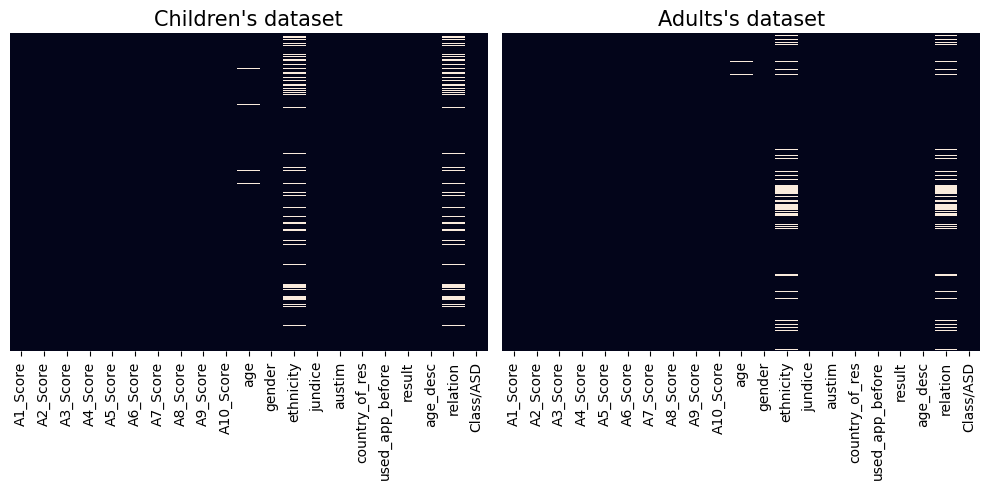

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0])
ax[0].set_title("Children's dataset",fontsize = 15)

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1])
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))

print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


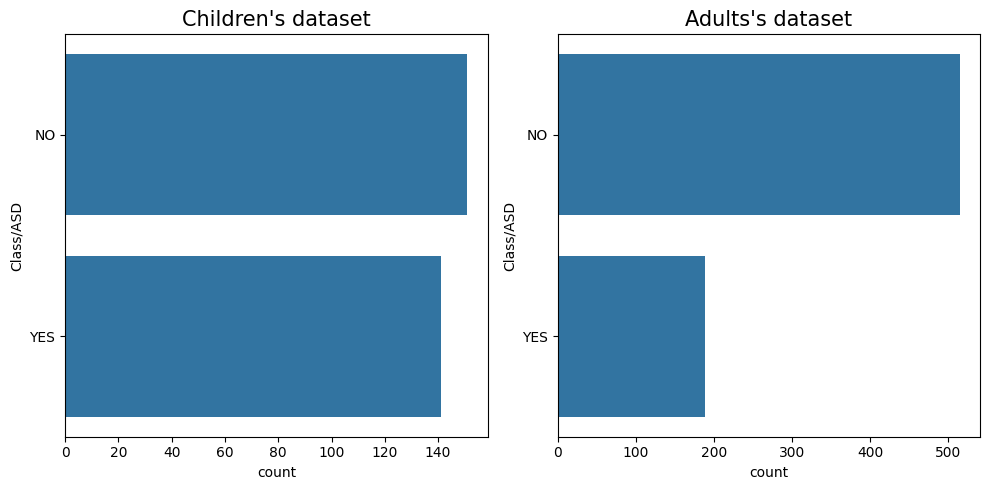

In [ ]:
#Data distribution
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.countplot(ch['Class/ASD'],ax=ax[0])
sns.countplot(adu['Class/ASD'],ax=ax[1])
ax[0].set_title("Children's dataset",fontsize = 15)
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution.pdf', transparent=True, dpi=300)

In [ ]:
#Since age of toddlers are represented in months, age(in years) of childs is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12

#Since age of toddlers are represented in months, age(in years) of childs is converted to age in months.
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

adu['Age_Mons'] = adu['Age_Mons']*12

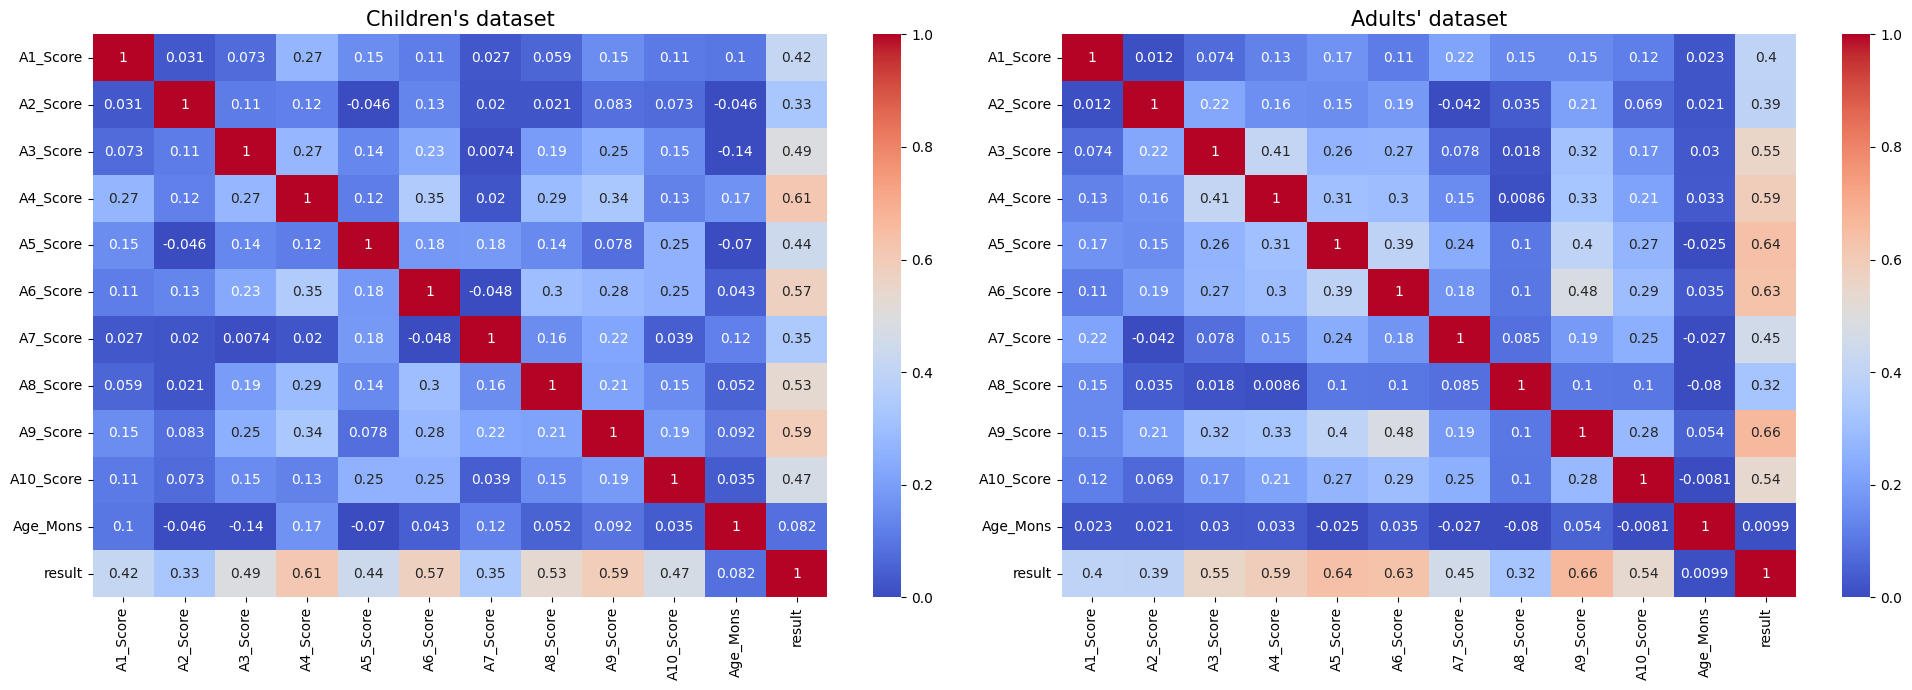

In [ ]:
# Select only numeric columns
ch_numeric = ch.select_dtypes(include=['int64', 'float64'])
adu_numeric = adu.select_dtypes(include=['int64', 'float64'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot children's dataset correlation heatmap
sns.heatmap(ch_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax[0])
ax[0].set_title("Children's dataset", fontsize=15)

# Plot adults' dataset correlation heatmap
sns.heatmap(adu_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax[1])
ax[1].set_title("Adults' dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Use the correct column name (e.g., 'Age_Mons' if it was renamed)
ch['Age_Mons'] = imputer_mode.fit_transform(ch['Age_Mons'].values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]


#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')

# Use the correct column name for 'adu' as well
ch['Age_Mons'] = imputer_mode.fit_transform(ch['Age_Mons'].values.reshape(-1,1))[:,0]
adu['Age_Mons'] = imputer_mode.fit_transform(adu['Age_Mons'].values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset    =  0
After imputing,
No of missing values in Adults's dataset      =  0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12
adu['Age_Mons'] = adu['Age_Mons']*12

In [ ]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

*Spliting dependent and independent features*


Combined dataset


In [ ]:
#Adding a new field that represents the age group
ch['Age_group'] = 'Children'
adu['Age_group'] = 'Adults'
#Combining the dataset of children and adults to a single dataset
frames = [ch,adu]
final = pd.concat(frames)
#imputing missing values
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

final.contry_of_res = imputer_mode.fit_transform(final.country_of_res.values.reshape(-1,1))[:,0]
final.used_app_before = imputer_mode.fit_transform(final.used_app_before.values.reshape(-1,1))[:,0]

final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD,Age_group
0,1,1,0,0,1,1,0,1,0,0,...,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO,Children
1,1,1,0,0,1,1,0,1,0,0,...,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO,Children
2,1,1,0,0,0,1,1,1,0,0,...,White-European,no,no,Jordan,yes,5,'4-11 years',Parent,NO,Children
3,0,1,0,0,1,1,0,0,0,1,...,White-European,yes,no,Jordan,no,4,'4-11 years',Parent,NO,Children
4,1,1,1,1,1,1,1,1,1,1,...,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES,Children


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         996 non-null    int64  
 1   A2_Score         996 non-null    int64  
 2   A3_Score         996 non-null    int64  
 3   A4_Score         996 non-null    int64  
 4   A5_Score         996 non-null    int64  
 5   A6_Score         996 non-null    int64  
 6   A7_Score         996 non-null    int64  
 7   A8_Score         996 non-null    int64  
 8   A9_Score         996 non-null    int64  
 9   A10_Score        996 non-null    int64  
 10  Age_Mons         996 non-null    float64
 11  gender           996 non-null    object 
 12  ethnicity        996 non-null    object 
 13  jundice          996 non-null    object 
 14  austim           996 non-null    object 
 15  country_of_res   996 non-null    object 
 16  used_app_before  996 non-null    object 
 17  result           996 

In [ ]:
final.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,result
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.695783,0.476908,0.541165,0.512048,0.570281,0.409639,0.472892,0.604418,0.373494,0.618474,3289.647616,5.275100
std,0.460306,0.499717,0.498553,0.500106,0.495285,0.492014,0.499515,0.489221,0.483975,0.486005,2522.938154,2.516802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,576.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1440.000000,3.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3168.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4320.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55152.000000,10.000000


In [ ]:
final.shape

(996, 22)

In [ ]:
print("\nNo of individuals diagonised with ASD = ",len(final[final['Class/ASD'] == 'YES']))
print("No of individuals not diagonised with ASD = ",len(final[final['Class/ASD'] == 'NO']))


No of individuals diagonised with ASD =  330
No of individuals not diagonised with ASD =  666


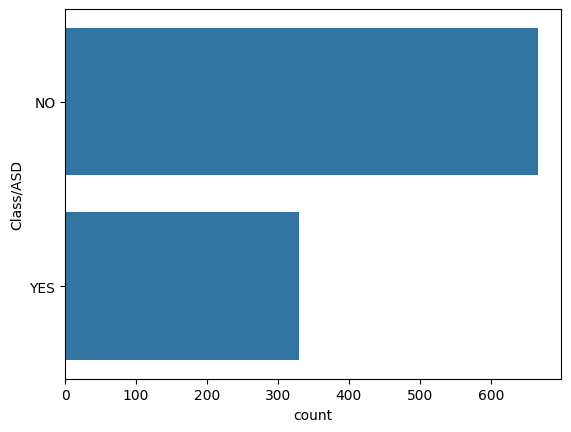

In [ ]:
sns.countplot(final['Class/ASD'])
plt.savefig('combined_dataset.pdf', transparent=True, dpi=300)

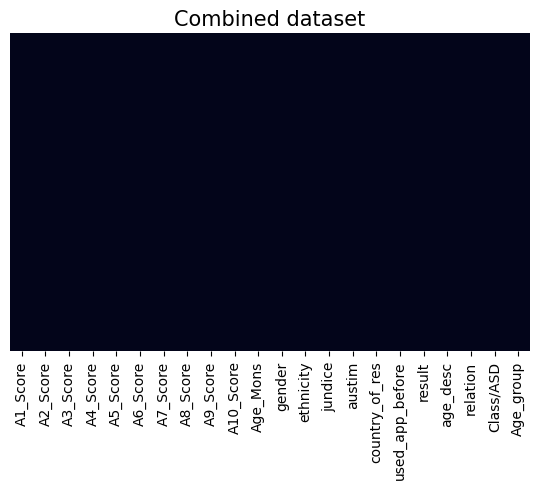

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Combined dataset",fontsize = 15)

fig.tight_layout()
plt.savefig('heatmap_final.pdf', transparent=True, dpi=300)

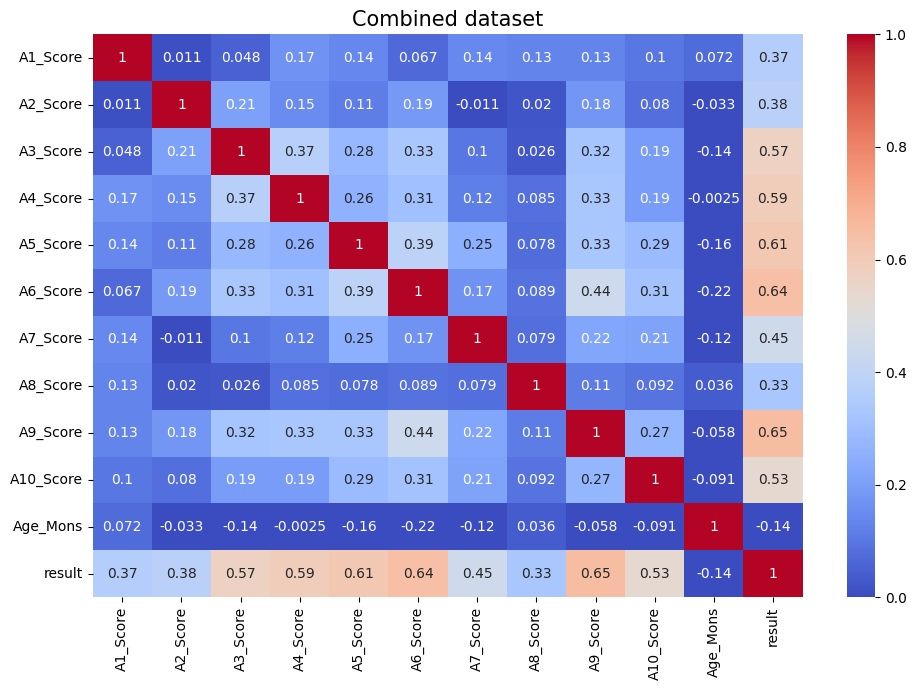

In [ ]:
# Select only numeric columns from 'final' DataFrame
final_numeric = final.select_dtypes(include=['int64', 'float64'])

# Plot heatmap for the combined dataset
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(final_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)  # Adjust vmin=-1 and vmax=1
ax.set_title("Combined dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation_final.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
shuffled_data = final.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=662)
final= pd.concat([ASD_data, non_ASD_data])
# Split the data into features and target label
raw_target= final['Class/ASD']
raw_features = final[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'country_of_res','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,country_of_res,relation
121,1,0,1,1,1,1,1,1,1,1,0.034301,f,White-European,no,no,'United States',Self
309,1,1,1,1,1,1,0,1,0,0,0.142480,f,'Middle Eastern ',no,no,'United Kingdom',Self
301,1,1,1,1,1,1,1,1,1,1,0.076517,f,White-European,yes,no,'United Kingdom',Self
524,1,1,1,1,0,1,0,1,1,1,0.087071,m,White-European,no,no,'United Kingdom',Self
197,1,0,1,1,1,1,1,1,1,1,0.089710,m,White-European,no,no,Germany,Self


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score,
    roc_curve, auc, log_loss, confusion_matrix
)

def model_report(y_act, y_pred):
    # Convert labels to numeric if necessary
    if isinstance(y_act.iloc[0], str):  # If y_act contains 'YES'/'NO'
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()
        y_pred = lb.transform(y_pred).ravel()

    print("Accuracy =", accuracy_score(y_act, y_pred))
    print("Precision =", precision_score(y_act, y_pred))
    print("Recall/Sensitivity =", recall_score(y_act, y_pred))

    # Confusion matrix calculations
    confusion = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = confusion.ravel()
    specificity = TN / (TN + FP)
    print("Specificity =", specificity)
    print("F1 Score =", f1_score(y_act, y_pred))

    # AUC calculation
    false_positive_rate, true_positive_rate, _ = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))

    print("Kappa Score =", cohen_kappa_score(y_act, y_pred))
    print("Log Loss =", log_loss(y_act, y_pred), "\n")


In [ ]:
def model_reports(y_act, y_pred):
    import numpy as np
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score, confusion_matrix

    # Convert y_act to NumPy array if not already
    y_act = np.array(y_act) if isinstance(y_act, list) else y_act
    y_pred = np.array(y_pred) if isinstance(y_pred, list) else y_pred

    # Convert categorical labels ('YES', 'NO') to numeric if necessary
    if isinstance(y_act[0], str):
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()

    # Compute Metrics
    accuracy = accuracy_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    recall = recall_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)

    # Compute confusion matrix for specificity
    conf_matrix = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    specificity = TN / (TN + FP)

    # Compute AUC Score
    auc_score = roc_auc_score(y_act, y_pred)

    # Compute Cohen’s Kappa Score
    kappa = cohen_kappa_score(y_act, y_pred)

    # Compute Log Loss
    logloss = log_loss(y_act, y_pred)

    # Print Metrics
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}\n")


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (992, 116)
y.shape: (992,)
X:      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
121         1         0         1         1         1         1         1   
309         1         1         1         1         1         1         0   
301         1         1         1         1         1         1         1   
524         1         1         1         1         0         1         0   
197         1         0         1         1         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
294         0         0         0         0         0         0         0   
66          1         0         0         0         1         0         0   
413         0         0         1         1         1         0         0   
651         1         0         0         0         0         0         1   
50          1         0         0         1         0         0         0   

     A8_Score  A9_Score  A10_Score  

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

actual_selected_features = [
    "A6_Score", "A9_Score", "A4_Score", "A5_Score", "A10_Score",
    "A3_Score", "A1_Score", "A7_Score", "A2_Score","Age_Mons", "A8_Score"

]

# Ensure selected features exist in the DataFrame
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = final['Class/ASD']

                            Feature  Importance Score
5                          A6_Score          0.115792
4                          A5_Score          0.106070
3                          A4_Score          0.105622
8                          A9_Score          0.102372
2                          A3_Score          0.060821
9                         A10_Score          0.058707
10                         Age_Mons          0.050763
6                          A7_Score          0.050081
0                          A1_Score          0.042745
7                          A8_Score          0.036943
1                          A2_Score          0.035261
41   country_of_res_'United States'          0.014164
22         ethnicity_White-European          0.013437
113                 relation_Parent          0.011536
115                   relation_Self          0.010577


In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (992, 11)
y.shape: (992,)
X:      A6_Score  A9_Score  A4_Score  A5_Score  A10_Score  A3_Score  A1_Score  \
121         1         1         1         1          1         1         1   
309         1         0         1         1          0         1         1   
301         1         1         1         1          1         1         1   
524         1         1         1         0          1         1         1   
197         1         1         1         1          1         1         1   
..        ...       ...       ...       ...        ...       ...       ...   
294         0         0         0         0          0         0         0   
66          0         0         0         1          1         0         1   
413         0         0         1         1          1         1         0   
651         0         0         0         0          1         0         1   
50          0         0         1         0          0         0         1   

     A7_Score  A2_Score  

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=334, n_neighbors=334,
                     weights='distance')


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'distance', 'n_neighbors': 334, 'leaf_size': 334, 'algorithm': 'ball_tree'}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='distance', n_neighbors= 334, leaf_size=334, algorithm='ball_tree')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=334, n_neighbors=334,
                     weights='distance')

In [ ]:
# Ensure that the best model exists before fitting
if knn_randomcv.best_estimator_ is not None:
    knn = knn_randomcv.best_estimator_
    knn.fit(X_train, y_train)  # Fit the model
else:
    raise ValueError("Error: No best estimator found in RandomizedSearchCV. Please check your hyperparameter tuning process.")


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred_knn = knn.predict(X_train)

# Predict on testing data
y_test_pred_knn = knn.predict(X_test)

# Compute accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_knn * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_knn * 100:.2f}%")

model_report(y_test, y_test_pred_knn)


Training Accuracy: 100.00%
Testing Accuracy: 97.99%
Accuracy = 0.9798994974874372
Precision = 0.9538461538461539
Recall/Sensitivity = 0.9841269841269841
Specificity = 0.9779411764705882
F1 Score = 0.96875
AUC Score = 0.9810340802987861
Kappa Score = 0.9539405161439648
Log Loss = 0.7244955455098927 



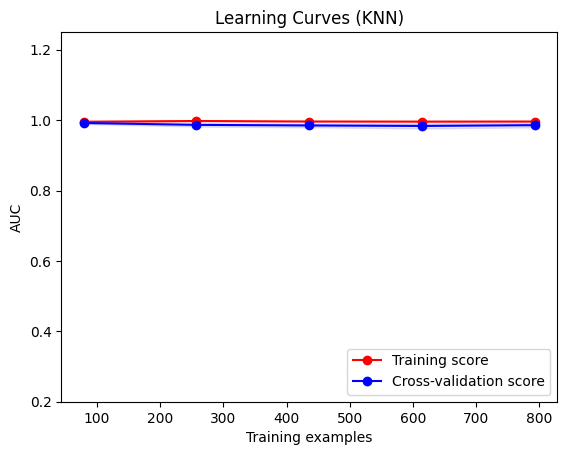

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define title for the plot
title = "Learning Curves (KNN)"

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initialize the KNN model with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Adjust parameters if needed

# Plot the learning curve
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)

# Save the plots
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


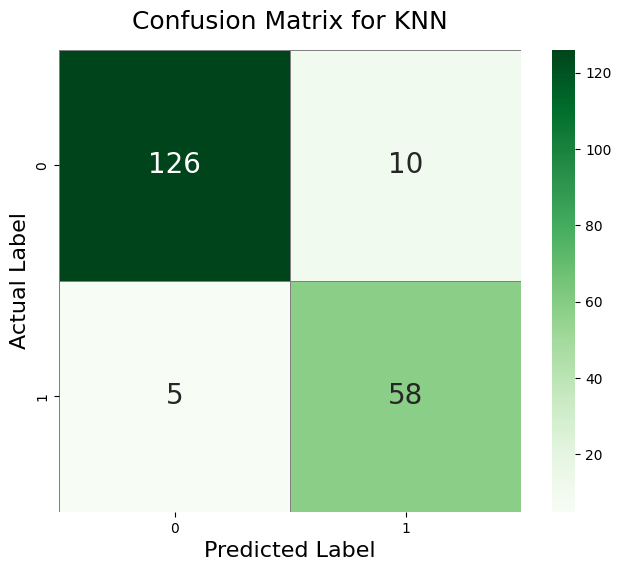

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the KNN model is trained
knn.fit(X_train, y_train)  # Make sure the model is trained before prediction

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Adjusted for better proportions
ax = sns.heatmap(cm, cmap="Greens", annot=True, fmt='d', square=True,
                 annot_kws={"size": 20}, linewidths=0.5, linecolor='gray')

# Formatting
plt.title('Confusion Matrix for KNN', fontsize=18, pad=15)
ax.set_ylabel('Actual Label', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=16)

# Save the confusion matrix with proper formatting
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300, bbox_inches='tight')

# Show plot
plt.show()



##SVM Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.0078259 , 0.01315861, 0.01146684, 0.02021184, 0.00578022,
       0.02947192, 0.00554209, 0.01050515, 0.02934427, 0.01023464,
       0.01803966, 0.00612378, 0.00997324, 0.02977185, 0.01018205,
       0.00981922, 0.00549512, 0.03111663, 0.00642772, 0.03371854,
       0.01013985, 0.00842667, 0.00893431, 0.0053915 , 0.00923462,
       0.0079514 , 0.03095999, 0.0316803 , 0.00546446, 0.02998657,
       0.00994678, 0.0107656 , 0.00872502, 0.00611534, 0.00731783,
       0.0347096 , 0.03188968, 0.03478398, 0.01121244, 0.00962882,
       0.00618277, 0.00925808, 0.03388038, 0.01190543, 0.00922627,
       0.00556774, 0.00863581, 0.0106853 , 0.00814996, 0.00991263,
       0.00794477, 0.03201795, 0.00941315, 0.00864387, 0.00874124,
       0.01144056, 0.03132501, 0.00887184, 0.00658479, 0.00740867,
       0.00660868, 0.01940022, 0.03207259, 0.00983667, 0.01095643,
       0.0097465 , 0.03122487, 0.00580254, 0.00968413, 0.00957975,
       0.03033967, 0.00587993

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=13, kernel='linear')


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'linear', 'degree': 3, 'C': 13}


In [ ]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [ ]:
y_pred_svc = svc.predict(X_test)
model_report(y_test, y_pred_svc)


Accuracy = 1.0
Precision = 1.0
Recall/Sensitivity = 1.0
Specificity = 1.0
F1 Score = 1.0
AUC Score = 1.0
Kappa Score = 1.0
Log Loss = 2.2204460492503136e-16 



In [ ]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

# Calculate accuracy
train_acc_svc = accuracy_score(y_train, y_train_pred_svc)
test_acc_svc = accuracy_score(y_test, y_test_pred_svc)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_svc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_svc * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


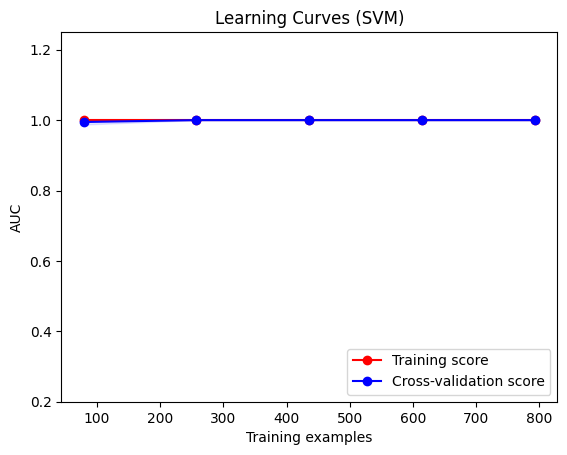

In [ ]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

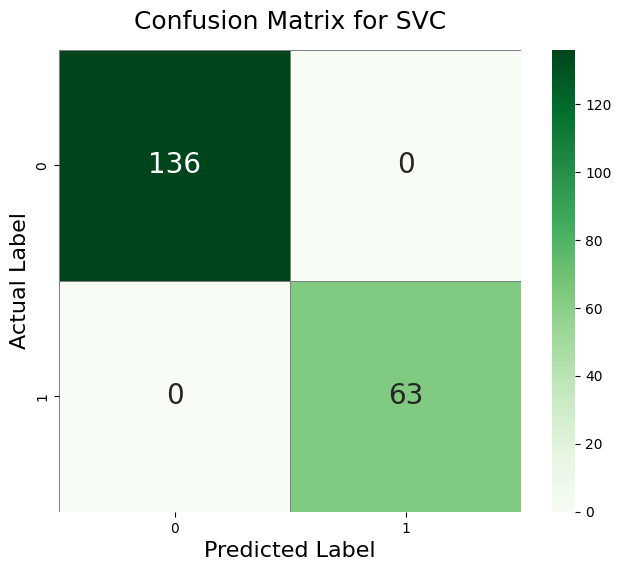

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Adjusted for better proportions
ax = sns.heatmap(cm, cmap="Greens", annot=True, fmt='d', square=True,
                 annot_kws={"size": 20}, linewidths=0.5, linecolor='gray')

# Formatting
plt.title('Confusion Matrix for SVC', fontsize=18, pad=15)
ax.set_ylabel('Actual Label', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=16)

# Save the confusion matrix with proper formatting
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


##Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([1.46825652e+00, 3.94847727e+00, 5.32576241e+00, 1.14250183e-03,
       6.37855339e-01, 1.79114299e+00, 5.44438181e+00, 1.15513802e-03,
       3.65947151e+00, 1.85559325e+00, 1.16591454e-03, 1.09457970e-03,
       9.47366428e-01, 1.24611855e-03, 9.47767210e-01, 1.02691650e-03,
       4.90635581e+00, 1.47745328e+00, 1.07040405e-03, 5.44042406e+00,
       4.98881054e-01, 1.76467896e-03, 4.30016508e+00, 1.18546486e-03,
       3.50851874e+00, 1.09024048e-03, 1.94435186e+00, 1.36024609e+00,
       2.85125136e+00, 4.89017057e-01, 1.20491982e-03, 1.89083719e+00,
       1.04255676e-03, 3.53795681e+00, 5.33575354e+00, 4.47269039e+00,
       1.17330551e-03, 4.16321163e+00, 1.03607178e-03, 4.86648211e+00,
       1.22070312e-03, 5.59534283e+00, 2.31415968e+00, 1.08203888e-03,
       1.00274086e-03, 1.01118088e-03, 1.93177466e+00, 4.03213158e+00,
       4.90410748e+00, 1.42835269e+00, 1.06635094e-03, 6.05980430e+00,
       4.11616740e+00, 1.44914265e+00, 1.175

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2,
                       n_estimators=200)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1000, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 2, max_features = 'log2', max_depth = 1000, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='log2',
                       min_samples_leaf=2, n_estimators=800)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)

Accuracy = 0.949748743718593
Precision = 0.9649122807017544
Recall/Sensitivity = 0.873015873015873
Specificity = 0.9852941176470589
F1 Score = 0.9166666666666666
AUC Score = 0.929154995331466
Kappa Score = 0.8808240507845251
Log Loss = 1.8112388637747314 



In [ ]:
from sklearn.metrics import accuracy_score

# Extract the best model from RandomizedSearchCV
best_rf = rf_randomcv.best_estimator_  # Changed rf_random to rf_randomcv
print(f"\nBest Random Forest Model: {best_rf}")

# Ensure the best model is trained
best_rf.fit(X_train, y_train)  # This ensures it's properly fitted

# Predictions
y_train_pred_rf = best_rf.predict(X_train)
y_pred_rf = best_rf.predict(X_test)

# Compute accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_rf * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_rf * 100:.2f}%")



Best Random Forest Model: RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2,
                       n_estimators=200)
Training Accuracy: 99.75%
Testing Accuracy: 94.97%


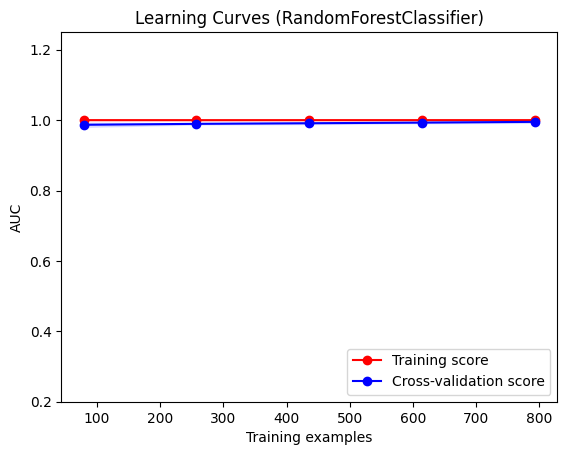

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

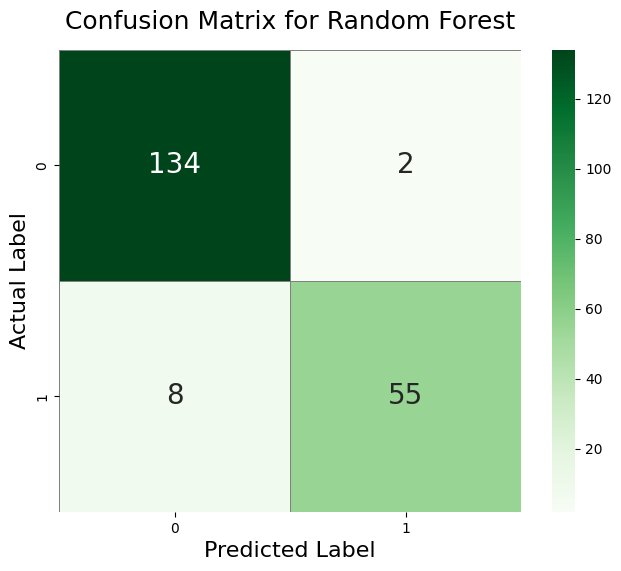

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Adjusted for better proportions
ax = sns.heatmap(cm, cmap="Greens", annot=True, fmt='d', square=True,
                 annot_kws={"size": 20}, linewidths=0.5, linecolor='gray')

# Formatting
plt.title('Confusion Matrix for Random Forest', fontsize=18, pad=15)
ax.set_ylabel('Actual Label', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=16)

# Save the confusion matrix with proper formatting
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.savefig('RF_confusion.eps', transparent=True, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (150, 155, 160),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)


 All results:
{'mean_fit_time': array([0.00498977, 0.00471864, 0.00547557, 0.00472565, 0.00485687,
       0.00489655, 0.00506601, 0.00495543, 0.00513449, 0.00461893,
       0.00490561, 0.00469136, 0.00510526, 0.00497527, 0.00676465,
       0.00481548, 0.00462356, 0.00102153, 0.00468001, 0.00664773,
       0.00479603, 0.00643187, 0.00486507, 0.00477533, 0.00452132,
       0.0043499 , 0.0048368 , 0.00677409, 0.00464716, 0.00468225,
       0.00565686, 0.00090108, 0.00463538, 0.00645061, 0.00472808,
       0.0050076 , 0.00455627, 0.00835414, 0.0046113 , 0.00547261,
       0.00429363, 0.00088625, 0.0043963 , 0.00465999, 0.00544395,
       0.00469561, 0.00438113, 0.00431681, 0.00455027, 0.0065033 ,
       0.00515499, 0.00524349, 0.00447292, 0.00446424, 0.0008842 ,
       0.00085249, 0.00444336, 0.00513201, 0.00473752, 0.00452456,
       0.00439119, 0.00555978, 0.00431132, 0.00575438, 0.00083756,
       0.00486131, 0.00462589, 0.00525198, 0.00443797, 0.00453286,
       0.00469608, 0.00474782

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)


 Best estimator:
DecisionTreeClassifier(max_depth=150, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)


 Best hyperparameters:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 150, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth = 155, criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=155)

In [ ]:
y_pred_dt = dt.predict(X_test)
model_report(y_test, y_pred_dt)

Accuracy = 0.9246231155778895
Precision = 0.8870967741935484
Recall/Sensitivity = 0.873015873015873
Specificity = 0.9485294117647058
F1 Score = 0.88
AUC Score = 0.9107726423902894
Kappa Score = 0.8250600714997363
Log Loss = 2.7168582956620972 



In [ ]:
# Extract the best model from RandomizedSearchCV
best_dt = dt_decision_tree.best_estimator_
print(f"\nBest Decision Tree Model: {best_dt}")

# Ensure the best model is fitted
best_dt.fit(X_train, y_train)  # This step ensures it's trained before use

# Predictions
y_train_pred_dt = best_dt.predict(X_train)
y_pred_dt = best_dt.predict(X_test)

# Compute accuracy
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)  # Fixed variable name
test_acc_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_dt * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_dt * 100:.2f}%")



Best Decision Tree Model: DecisionTreeClassifier(max_depth=150, random_state=42)
Training Accuracy: 100.00%
Testing Accuracy: 91.96%


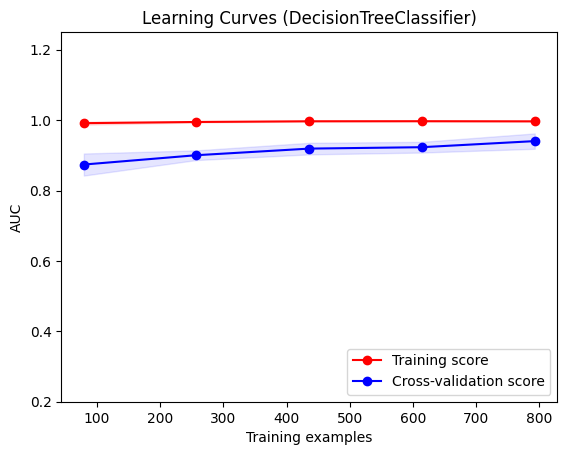

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

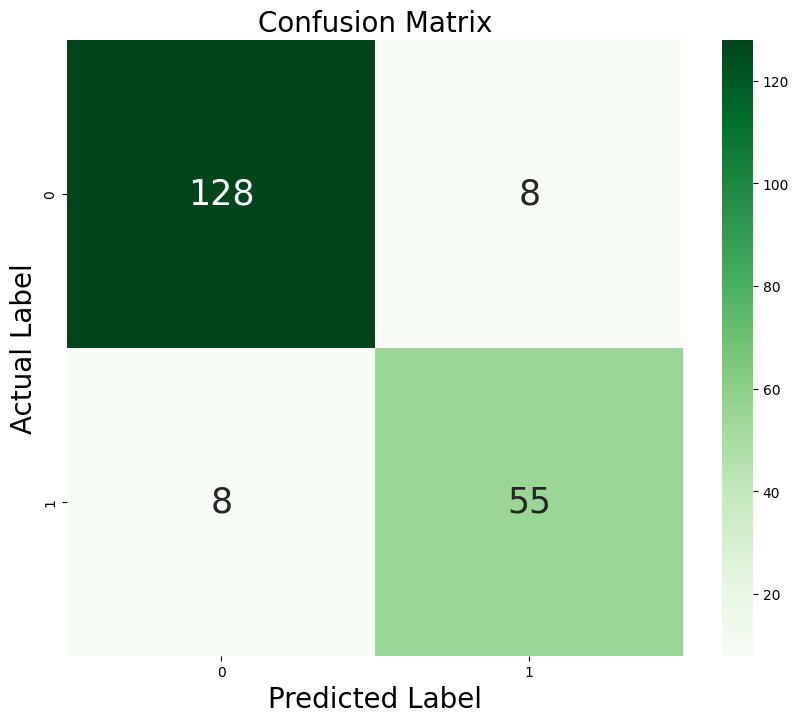

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap="Greens", annot=True, fmt="d", square=True, annot_kws={"size": 25})

# Formatting labels and title
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)

# Save the confusion matrix in different formats
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


##XGBClassifier

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uni

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best hyperparameters: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1}

=== XGBoost Model ===
Training Accuracy: 100.00%
Testing Accuracy: 98.49%

Accuracy = 0.9849246231155779
Precision = 0.9838709677419355
Recall/Sensitivity = 0.9682539682539683
Specificity = 0.9926470588235294
F1 Score = 0.976
AUC Score = 0.9804505135387489
Kappa Score = 0.9650120142999472
Log Loss = 0.5433716591324196 



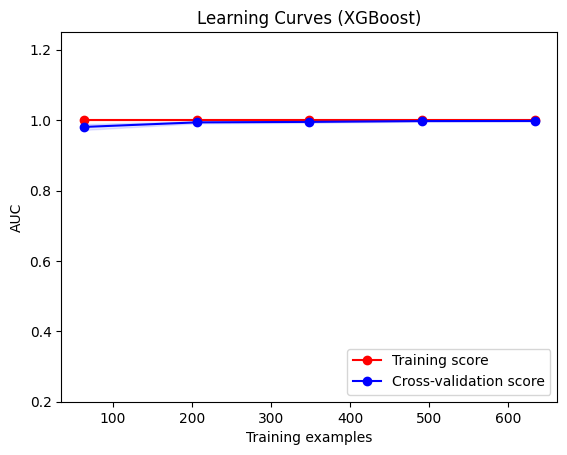

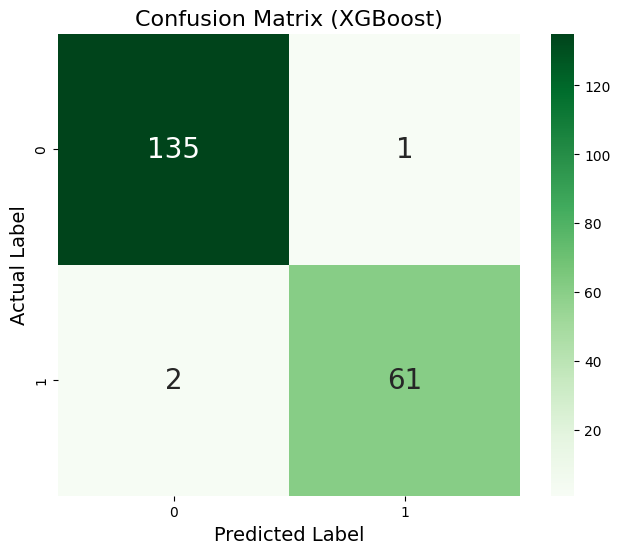

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define XGBoost classifier
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define hyperparameter grid
parameters = {
    'max_depth': range(3, 10),  # Avoid depth=2 for better generalization
    'n_estimators': range(100, 300, 50),  # Increase range for more exploration
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform randomized search
xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=True,
    n_iter=20  # Limit iterations for efficiency
)

# Fit the model
xg_randomcv.fit(X_train, y_train_encoded)

# Print best parameters
print('\n Best hyperparameters:', xg_randomcv.best_params_)

# Train best model
best_params = xg_randomcv.best_params_
xg = XGBClassifier(**best_params)
xg.fit(X_train, y_train_encoded)

# Predictions
y_pred_xg = xg.predict(X_test)

# Compute Training & Testing Accuracy
y_train_pred_xg = xg.predict(X_train)
train_acc_xg = accuracy_score(y_train_encoded, y_train_pred_xg)
test_acc_xg = accuracy_score(y_test_encoded, y_pred_xg)

# Print Accuracies
print("\n=== XGBoost Model ===")
print(f"Training Accuracy: {train_acc_xg * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_xg * 100:.2f}%\n")

# Generate model report
model_report(pd.Series(y_test_encoded), pd.Series(y_pred_xg))

# Learning Curve
title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(xg, title, X_train, y_train_encoded, ylim=(0.2, 1.25), cv=cv, n_jobs=-1)

plt.savefig('XG_curve.pdf', transparent=True, dpi=300)
plt.savefig('XG_curve.eps', transparent=True, dpi=300)
plt.show()

# Confusion Matrix
cm_xg = confusion_matrix(y_test_encoded, y_pred_xg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, cmap="Greens", annot=True, fmt='d', square=True, annot_kws={"size": 20})
plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Save confusion matrix
plt.savefig('XGBoost_confusion.pdf', transparent=True, dpi=300)
plt.savefig('XGBoost_confusion.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
print('\n All results:')
print(xg_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.22822213, 0.2739471 , 0.16210804, 0.39769077, 0.3879004 ,
       0.30626092, 0.06540489, 0.15506067, 0.21960759, 0.11004524,
       0.12441268, 0.08456244, 0.17311811, 0.26228333, 0.12824025,
       0.15353651, 0.11590929, 0.15229082, 0.10588474, 0.11972866]), 'std_fit_time': array([0.09677489, 0.02589951, 0.0244994 , 0.09086818, 0.06002858,
       0.09828931, 0.01862107, 0.02766425, 0.05151045, 0.02296018,
       0.03227339, 0.02405451, 0.0349929 , 0.05385562, 0.05096972,
       0.03367445, 0.04463515, 0.03775816, 0.03316681, 0.03467916]), 'mean_score_time': array([0.02195616, 0.03405452, 0.02889185, 0.04130588, 0.03527808,
       0.0304009 , 0.01569057, 0.02063303, 0.01798339, 0.03037882,
       0.01808362, 0.01940403, 0.01660957, 0.03019462, 0.01940455,
       0.01705341, 0.01841006, 0.01950817, 0.01622562, 0.01735773]), 'std_score_time': array([0.01545722, 0.00501283, 0.0050309 , 0.01221723, 0.01147638,
       0.0117772 , 0.00729589, 0.0086

In [ ]:
print('\n Best estimator:')
print(xg_randomcv.best_estimator_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1}


##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
#fit the randomized model
lr_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.06558127, 0.01692061, 0.00092554, 0.00104699, 0.00206218,
       0.01756606, 0.0134654 , 0.01065989, 0.00179682, 0.07804708]), 'std_fit_time': array([3.22951771e-02, 1.45243756e-02, 5.90200365e-05, 2.92160644e-04,
       1.85108747e-03, 1.01702418e-02, 2.71279473e-03, 2.64525845e-03,
       1.88057005e-03, 7.10007719e-02]), 'mean_score_time': array([0.00592618, 0.00276227, 0.        , 0.        , 0.        ,
       0.00244589, 0.00442657, 0.00477238, 0.        , 0.00293298]), 'std_score_time': array([0.00303688, 0.00055583, 0.        , 0.        , 0.        ,
       0.00037139, 0.00298329, 0.00238912, 0.        , 0.0012069 ]), 'param_penalty': masked_array(data=['l2', 'l2', 'l1', 'l1', 'l1', 'l2', 'l2', 'l2', 'l1',
                   'l2'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=np.str_('?'),
            dtype=object), 'param_C': masked_array(data=[0.01, 0.1

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)


 Best estimator:
LogisticRegression(C=1000, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)


 Best hyperparameters:
{'penalty': 'l2', 'C': 1000}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 10 ,random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [ ]:
y_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)

Accuracy = 1.0
Precision = 1.0
Recall/Sensitivity = 1.0
Specificity = 1.0
F1 Score = 1.0
AUC Score = 1.0
Kappa Score = 1.0
Log Loss = 2.2204460492503136e-16 



In [ ]:
from sklearn.metrics import accuracy_score
# Create and train the model
lr = LogisticRegression(penalty='l2', C=1000)
lr.fit(X_train, y_train)  # This line is crucial and was likely missing

# Predict on training data
y_train_pred_lr = lr.predict(X_train)

# Predict on testing data
y_pred_lr = lr.predict(X_test)

# Compute accuracy
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_lr * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_lr * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


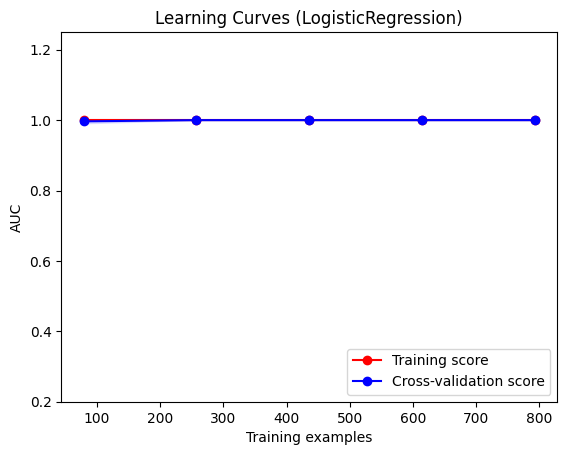

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 1000)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

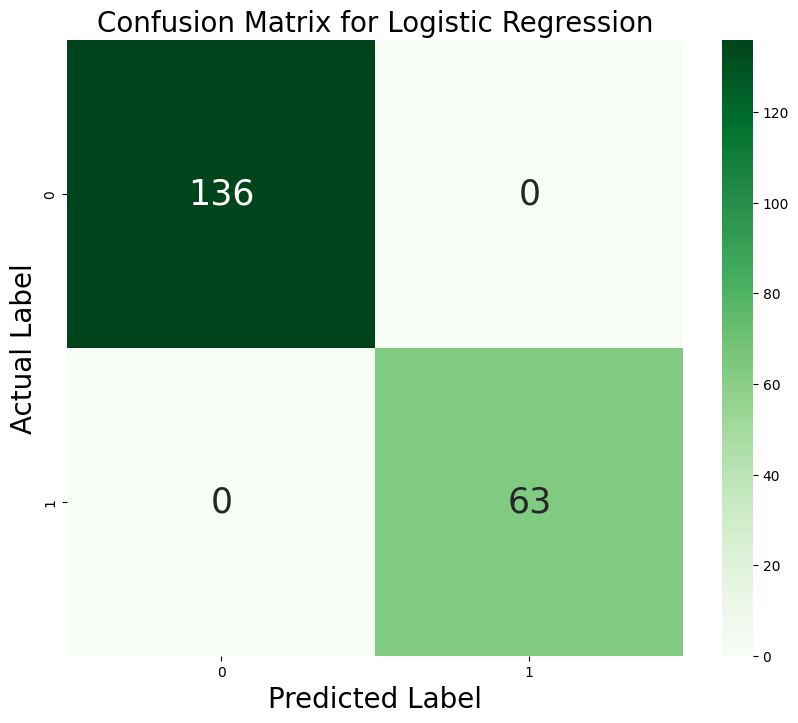

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create the heatmap with proper integer formatting
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap="Greens", annot=True, fmt="d", square=True, annot_kws={"size": 25})

# Formatting labels and title
plt.title('Confusion Matrix for Logistic Regression', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)

# Save the confusion matrix in different formats
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


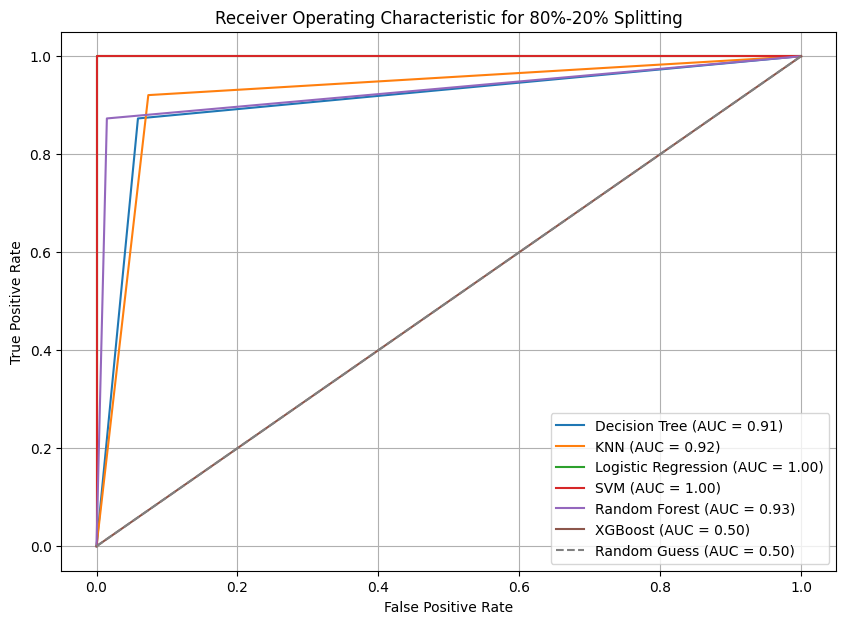

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode y_test ('YES' -> 1, 'NO' -> 0)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Ensure all predictions are encoded to match (0 or 1)
y_pred_dt_encoded = np.where(y_pred_dt == 'YES', 1, 0)
y_pred_knn_encoded = np.where(y_pred_knn == 'YES', 1, 0)
y_pred_LR_encoded = np.where(y_pred_lr == 'YES', 1, 0)
y_pred_svc_encoded = np.where(y_pred_svc == 'YES', 1, 0)
y_pred_rf_encoded = np.where(y_pred_rf == 'YES', 1, 0)
y_pred_xg_encoded = np.where(y_pred_xg == 'YES', 1, 0)

# Compute ROC curves and AUC scores
models = {
    "Decision Tree": y_pred_dt_encoded,
    "KNN": y_pred_knn_encoded,
    "Logistic Regression": y_pred_LR_encoded,
    "SVM": y_pred_svc_encoded,
    "Random Forest": y_pred_rf_encoded,
    "XGBoost": y_pred_xg_encoded
}

plt.figure(figsize=(10, 7))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot Random Guess (Baseline)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess (AUC = 0.50)")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for 80%-20% Splitting")
plt.legend(loc="lower right")
plt.grid()

# Save the figure
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, cohen_kappa_score, log_loss, roc_curve
)

# Create an empty list to store results
model_metrics = []

def model_report(model_name, y_true, y_pred):
    """
    Computes classification metrics for a given model and appends results to a list in percentage format.
    """
    # Basic metrics in percentage
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    auc = roc_auc_score(y_true, y_pred) * 100

    # Specificity calculation: TN / (TN + FP)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = (tn / (tn + fp)) * 100 if (tn + fp) != 0 else 0

    # AUC Score Calculation
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred) * 100

    # Kappa Score & Log Loss
    kappa = cohen_kappa_score(y_true, y_pred) * 100
    logloss = log_loss(y_true, y_pred)

    # Append results to the list
    model_metrics.append({
        "Model": model_name,
        "Accuracy (%)": round(accuracy, 2),
        "Precision (%)": round(precision, 2),
        "Recall (%)": round(recall, 2),
        "Specificity (%)": round(specificity, 2),
        "F1 Score (%)": round(f1, 2),
        "AUC Score (%)": round(auc_score, 2),
        "Kappa Score (%)": round(kappa, 2),
        "Log Loss": round(logloss, 4)
    })

# Example: Call model_report for each model
model_report("Decision Tree", y_test_encoded, y_pred_dt_encoded)
model_report("KNN", y_test_encoded, y_pred_knn_encoded)
model_report("Logistic Regression", y_test_encoded, y_pred_LR_encoded)
model_report("SVM", y_test_encoded, y_pred_svc_encoded)
model_report("Random Forest", y_test_encoded, y_pred_rf_encoded)
model_report("XGBoost", pd.Series(y_test_encoded), pd.Series(y_pred_xg))

# Convert list to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display final metrics table
print(df_metrics)


                 Model  Accuracy (%)  Precision (%)  Recall (%)  \
0        Decision Tree         91.96          87.30       87.30   
1                  KNN         92.46          85.29       92.06   
2  Logistic Regression        100.00         100.00      100.00   
3                  SVM        100.00         100.00      100.00   
4        Random Forest         94.97          96.49       87.30   
5              XGBoost         98.49          98.39       96.83   

   Specificity (%)  F1 Score (%)  AUC Score (%)  Kappa Score (%)  Log Loss  
0            94.12         87.30          90.71            81.42    2.8980  
1            92.65         88.55          92.36            82.94    2.7169  
2           100.00        100.00         100.00           100.00    0.0000  
3           100.00        100.00         100.00           100.00    0.0000  
4            98.53         91.67          92.92            88.08    1.8112  
5            99.26         97.60          98.05            96.50    

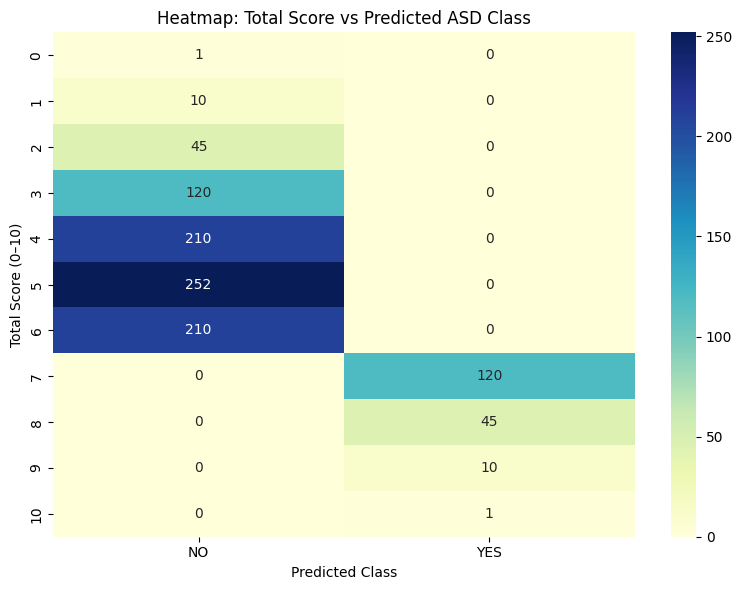

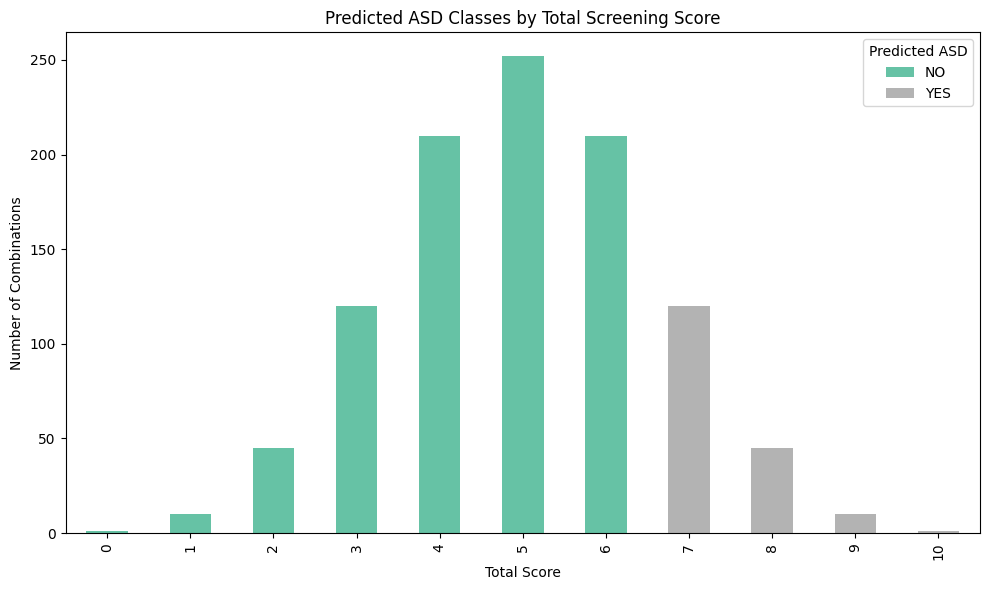

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = final.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = SVC(kernel='linear', degree=3, C=13, probability=True)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations: {acc * 100:.2f}%")

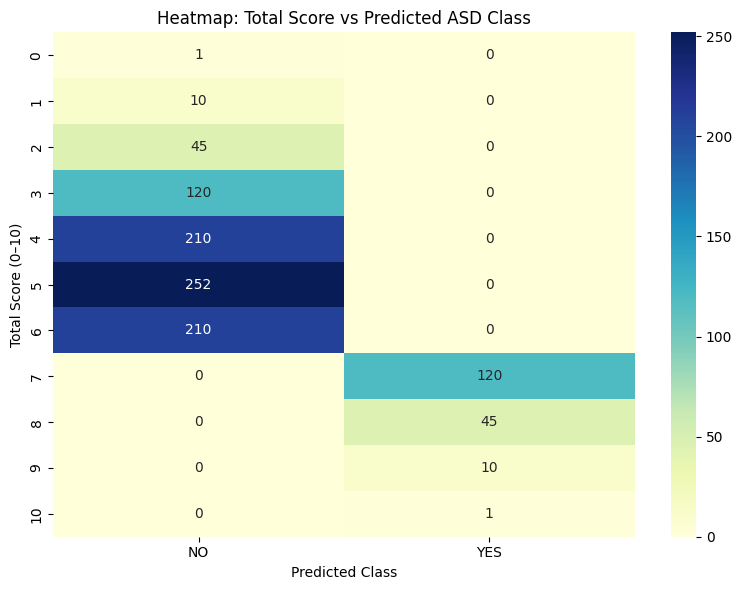

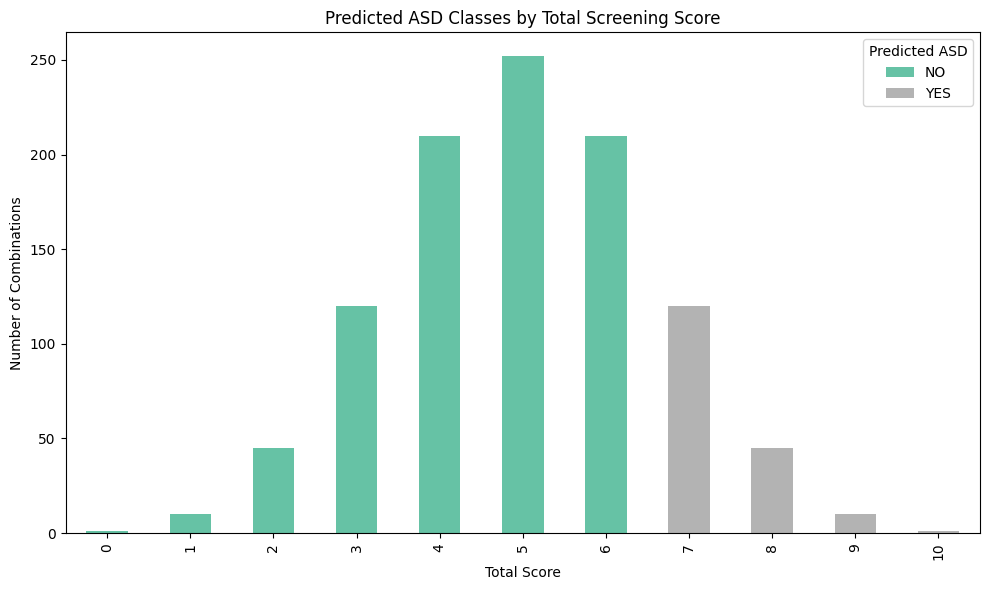

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = final.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=42)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations: {acc * 100:.2f}%")